# Lab2: Clustering

In [92]:
import pandas as pd

import data

In [93]:
raw_data = pd.read_csv("dataset/raw_data.csv")
raw_data

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


drop unusable column

In [94]:
data = raw_data.drop(["ID", "Flow.ID", "Timestamp"], axis=1)
data

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,10.200.7.196,39485,172.217.29.66,443,6,2021337,9,5,795,625,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,10.200.7.196,43024,179.1.4.244,443,6,65552,14,8,373,5252,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,10.200.7.196,43031,179.1.4.244,443,6,107032,14,12,373,10784,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,10.200.7.196,43064,179.1.4.244,443,6,75351,14,11,373,10784,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,10.200.7.196,43076,179.1.4.244,443,6,65862,15,13,373,11396,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,10.200.7.7,59979,172.16.255.183,53,17,119040676,2146,2138,80152,234873,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,10.200.7.7,59979,172.16.255.183,53,17,31408313,647,642,24421,65673,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,10.200.7.9,48859,172.16.255.200,53,17,76350907,4,0,180,0,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,10.200.7.9,48859,172.16.255.200,53,17,13621158,4,0,180,0,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


visualization before one hot encoding

array([[<AxesSubplot: title={'center': 'Flow.Duration'}>,
        <AxesSubplot: title={'center': 'Average.Packet.Size'}>]],
      dtype=object)

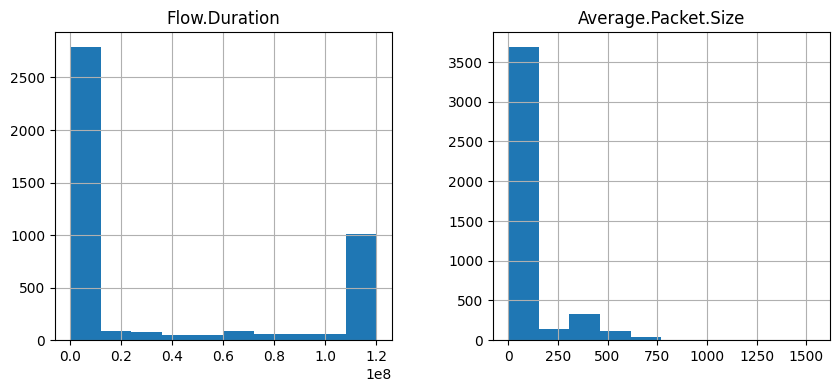

In [95]:
data[["Flow.Duration", "Average.Packet.Size"]].hist(figsize=(10, 4))

<AxesSubplot: xlabel='Destination.Port', ylabel='count'>

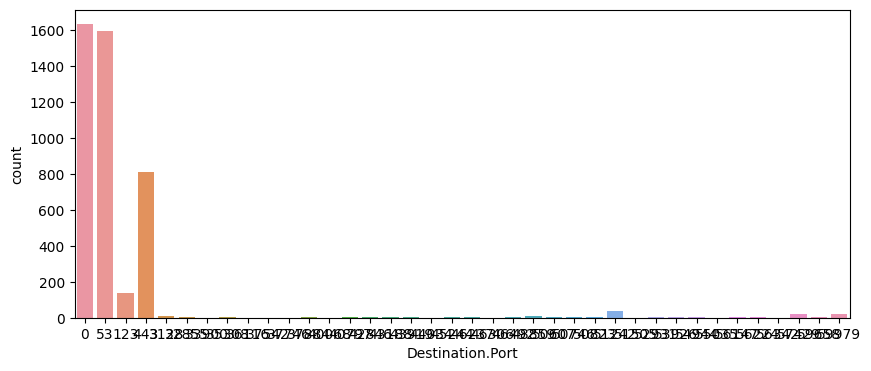

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axes = plt.subplots(figsize=(10, 4))

sns.countplot(x="Destination.Port", data=data, ax=axes)

In [97]:
display(data["Destination.Port"].value_counts())

0        1631
53       1593
443       812
123       135
51242      40
57429      20
59979      18
48859       8
3128        7
54944       4
52931       4
46237       3
50607       2
37884       2
32855       2
40797       2
43919       2
50746       2
43188       2
53926       2
59658       2
50823       2
56224       2
35308       2
42846       2
46492       2
45244       2
56147       2
36116       1
37746       1
46306       1
44034       1
33900       1
40068       1
56342       1
55035       1
37542       1
51505       1
Name: Destination.Port, dtype: int64

<AxesSubplot: xlabel='Protocol', ylabel='count'>

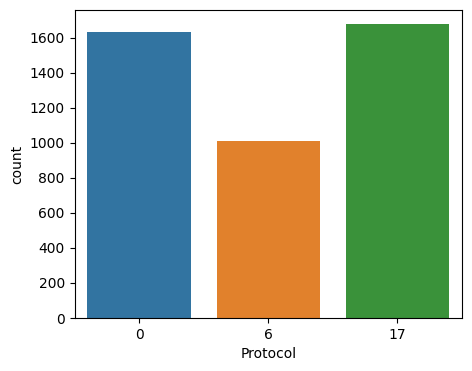

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axes = plt.subplots(figsize=(5, 4))

sns.countplot(x="Protocol", data=data, ax=axes)

## Feature Engineering

Drop the attribute same within all instance

In [99]:
for header in data.columns:
    if len(data[header].value_counts()) == 1:
        data = data.drop(header, axis=1)
data

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,10.200.7.196,39485,172.217.29.66,443,6,2021337,9,5,795,625,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
1,10.200.7.196,43024,179.1.4.244,443,6,65552,14,8,373,5252,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
2,10.200.7.196,43031,179.1.4.244,443,6,107032,14,12,373,10784,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
3,10.200.7.196,43064,179.1.4.244,443,6,75351,14,11,373,10784,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
4,10.200.7.196,43076,179.1.4.244,443,6,65862,15,13,373,11396,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,10.200.7.7,59979,172.16.255.183,53,17,119040676,2146,2138,80152,234873,...,2145,20,0.0,0.0,0,0,0.0,0.0,0,0
4313,10.200.7.7,59979,172.16.255.183,53,17,31408313,647,642,24421,65673,...,646,20,0.0,0.0,0,0,0.0,0.0,0,0
4314,10.200.7.9,48859,172.16.255.200,53,17,76350907,4,0,180,0,...,3,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883
4315,10.200.7.9,48859,172.16.255.200,53,17,13621158,4,0,180,0,...,3,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083


nominal data

In [100]:
nominal_col = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Label']

for col in nominal_col:
    try:
        data[col] = data[col].astype(str)
    except Exception as e:
        print(e)
pd.get_dummies(data)

'Label'


,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Destination.Port_55035,Destination.Port_56147,Destination.Port_56224,Destination.Port_56342,Destination.Port_57429,Destination.Port_59658,Destination.Port_59979,Protocol_0,Protocol_17,Protocol_6
0,2021337,9,5,795,625,487,0,88.333333,166.426410,482,...,0,0,0,0,0,0,0,0,0,1
1,65552,14,8,373,5252,223,0,26.642857,69.221614,1436,...,0,0,0,0,0,0,0,0,0,1
2,107032,14,12,373,10784,223,0,26.642857,69.221614,1436,...,0,0,0,0,0,0,0,0,0,1
3,75351,14,11,373,10784,223,0,26.642857,69.221614,2660,...,0,0,0,0,0,0,0,0,0,1
4,65862,15,13,373,11396,223,0,24.866667,67.057403,1436,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,119040676,2146,2138,80152,234873,66,27,37.349487,5.245217,342,...,0,0,0,0,0,0,0,0,1,0
4313,31408313,647,642,24421,65673,69,27,37.744977,6.118404,331,...,0,0,0,0,0,0,0,0,1,0
4314,76350907,4,0,180,0,45,45,45.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
4315,13621158,4,0,180,0,45,45,45.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


Set ignore column for preprocessing

In [101]:
numeric_data = data.drop(nominal_col, axis=1, errors='ignore')

Scaling

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tf_data = scaler.fit_transform(numeric_data)
tf_data = pd.DataFrame(tf_data, columns=numeric_data.columns)
tf_data

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0.000834,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0.447341,0.428571,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0.134724,0.428571,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.000626,0.428571,9.008458e-09,0.0,9.008458e-09,9.008458e-09,0.637175,0.0,0.637175,0.637175
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.000626,0.428571,9.008458e-09,0.0,9.008458e-09,9.008458e-09,0.113673,0.0,0.113673,0.113673


In [103]:
for col in nominal_col:
    if data.get(col) is None: continue
    tf_data[col] = data[col].astype(str)
tf_data = pd.get_dummies(tf_data)
tf_raw_data = tf_data.copy()
tf_data

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Destination.Port_55035,Destination.Port_56147,Destination.Port_56224,Destination.Port_56342,Destination.Port_57429,Destination.Port_59658,Destination.Port_59979,Protocol_0,Protocol_17,Protocol_6
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0,0,0,0,0,0,0,0,0,1
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0,0,0,0,0,0,0,0,0,1
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0,0,0,0,0,0,0,0,0,1
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0,0,0,0,0,0,0,0,0,1
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0,0,0,0,0,0,0,0,1,0
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0,0,0,0,0,0,0,0,1,0
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [104]:
ans = pd.read_csv("dataset/cluster.csv")
ans

,ID,Cluster
0,1651,0
1,6460,0
2,6578,0
3,7219,0
4,7683,0
...,...,...
4312,3572701,3
4313,3572728,3
4314,3573244,3
4315,3573361,3


In [105]:
ans["Cluster"].value_counts()

3    1695
2    1631
0     856
1     135
Name: Cluster, dtype: int64

draw 2d diagram for all data

In [106]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tf_data)
# display(reduced_data)
class_0 = 0
class_1 = 0
class_2 = 0
for i, c in enumerate(ans["Cluster"]):
    if c == 0:
        class_0 += 1
    if c <= 1:
        class_1 += 1
    if c <= 2:
        class_2 += 1
print(class_0, class_1, class_2)

856 991 2622


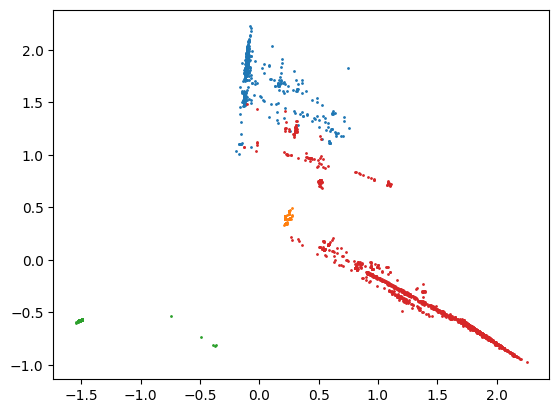

In [298]:
plt.scatter(reduced_data[:class_0, 0], reduced_data[:class_0, 1], s=1)
plt.scatter(reduced_data[class_0+1:class_1, 0], reduced_data[class_0+1:class_1, 1], s=1)
plt.scatter(reduced_data[class_1+1:class_2, 0], reduced_data[class_1+1:class_2, 1], s=1)
plt.scatter(reduced_data[class_2+1:, 0], reduced_data[class_2+1:, 1], s=1)

## Clustering

In [266]:
display(tf_data)

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Destination.Port_55035,Destination.Port_56147,Destination.Port_56224,Destination.Port_56342,Destination.Port_57429,Destination.Port_59658,Destination.Port_59979,Protocol_0,Protocol_17,Protocol_6
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0,0,0,0,0,0,0,0,0,1
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0,0,0,0,0,0,0,0,0,1
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0,0,0,0,0,0,0,0,0,1
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0,0,0,0,0,0,0,0,0,1
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0,0,0,0,0,0,0,0,1,0
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0,0,0,0,0,0,0,0,1,0
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [296]:
def draw_cluster(df: pd.DataFrame):
    lookup = {}
    for i in range(df.shape[0]):
        if lookup.get(df["cluster"][i]) is None:
            lookup[df["cluster"][i]] = [(df["x"][i], df["y"][i])]
        else:
            lookup[df["cluster"][i]].append((df["x"][i], df["y"][i]))
    for c, data in lookup.items():
        tmp = pd.DataFrame(data, columns=["x", "y"])
        plt.scatter(tmp["x"], tmp["y"], s=1)

### KMeans

In [277]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(tf_data)

cluster_labels = pd.DataFrame(kmeans.labels_, columns=["cluster"])
cluster_labels.value_counts()

cluster
0          1631
2          1135
3           950
1           601
dtype: int64

In [279]:
from sklearn.metrics import adjusted_mutual_info_score

adjusted_mutual_info_score(ans["Cluster"], cluster_labels['cluster'])

0.8179690835394418

In [293]:
kmeans_clustering = cluster_labels.join(pd.DataFrame(reduced_data, columns=["x", "y"]))

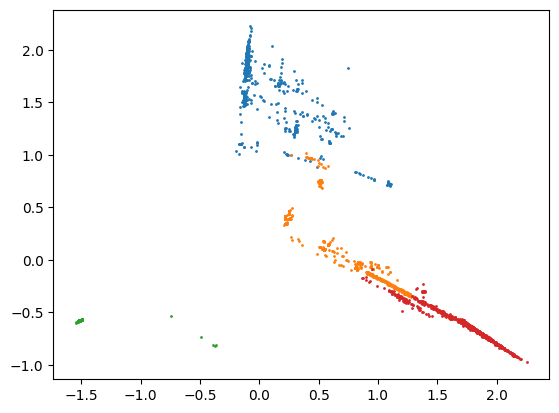

In [297]:
draw_cluster(kmeans_clustering)

### GaussianMixture

In [301]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4)
gm.fit(tf_data)
# display(db.predict(tf_data).shape)

_labels = pd.DataFrame(gm.predict(tf_data), columns=["cluster"])
_labels.value_counts()

cluster
1          1631
0          1293
3           945
2           448
dtype: int64

In [303]:
adjusted_mutual_info_score(ans["Cluster"], _labels["cluster"])

0.838861760089909

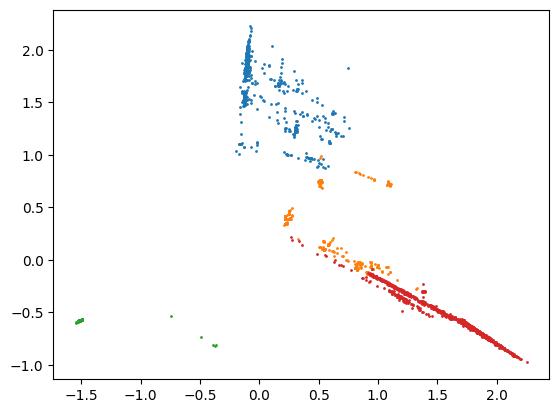

In [304]:
_clustering = _labels.join(pd.DataFrame(reduced_data, columns=["x", "y"]))
draw_cluster(_clustering)

### Autoencoder

In [113]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import RMSprop

def create_autoencoder(dims):
    n_stacks = len(dims) - 1

    # input
    input_layer = Input(shape=(dims[0],), name='input')
    x = input_layer

    # encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation='relu', kernel_initializer='glorot_uniform', name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer='glorot_uniform', name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded

    # decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation='relu', kernel_initializer='glorot_uniform', name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer='glorot_uniform', name='decoder_0')(x)
    decoded = x

    return Model(inputs=input_layer, outputs=decoded, name='AE'), Model(inputs=input_layer, outputs=encoded, name='encoder')

In [221]:
autoencoder, encoder = create_autoencoder((tf_raw_data.shape[-1], 128, 256, 256, 4))
autoencoder.compile(loss='mse', optimizer=RMSprop(learning_rate=1e-5))
autoencoder.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1177)]            0         
                                                                 
 encoder_0 (Dense)           (None, 128)               150784    
                                                                 
 encoder_1 (Dense)           (None, 256)               33024     
                                                                 
 encoder_2 (Dense)           (None, 256)               65792     
                                                                 
 encoder_3 (Dense)           (None, 4)                 1028      
                                                                 
 decoder_3 (Dense)           (None, 256)               1280      
                                                                 
 decoder_2 (Dense)           (None, 256)               65792    

In [222]:
autoencoder.fit(tf_raw_data, tf_raw_data, batch_size=16, epochs=15)
autoencoder.save_weights('ae_weights.h5')

Epoch 1/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0058
Epoch 2/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0056
Epoch 3/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0052
Epoch 4/15
270/270 [==============================] - 2s 7ms/step - loss: 0.0046
Epoch 5/15
270/270 [==============================] - 2s 7ms/step - loss: 0.0040
Epoch 6/15
270/270 [==============================] - 2s 7ms/step - loss: 0.0035
Epoch 7/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0030
Epoch 8/15
270/270 [==============================] - 2s 7ms/step - loss: 0.0027
Epoch 9/15
270/270 [==============================] - 2s 7ms/step - loss: 0.0026
Epoch 10/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0025
Epoch 11/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0024
Epoch 12/15
270/270 [==============================] - 2s 6ms/step - loss: 0.0023
Epoch 13/15
270/270 [====

Load weight

In [223]:
autoencoder.load_weights("ae_weights.h5")

predict

In [306]:
y_encoded = encoder.predict(tf_raw_data)
y_encoded

135/135 [==============================] - 0s 2ms/step


array([[-1.5298395 , -3.200782  ,  0.6145849 ,  1.0824691 ],
       [-1.6673633 , -3.5570436 ,  0.72312295,  1.1251018 ],
       [-1.7257487 , -3.6519022 ,  0.7898183 ,  1.1553893 ],
       ...,
       [-1.7042632 , -1.6485633 , -1.7545474 ,  0.21886793],
       [-1.1626363 , -1.0972742 , -1.2737259 ,  0.17632595],
       [-1.9644606 , -1.924157  , -1.9583558 ,  0.28476894]],
      dtype=float32)

In [345]:
import random
# y_pred = DBSCAN(eps=0.4, min_samples=2).fit_predict(y_encoded)
y_pred = KMeans(n_clusters=4).fit_predict(y_encoded)

In [346]:
y_pred = pd.DataFrame(y_pred, columns=["cluster"])
y_pred.value_counts()

cluster
0          1631
3          1085
2           973
1           628
dtype: int64

In [347]:
adjusted_mutual_info_score(ans["Cluster"], y_pred["cluster"])

0.8040995040760337

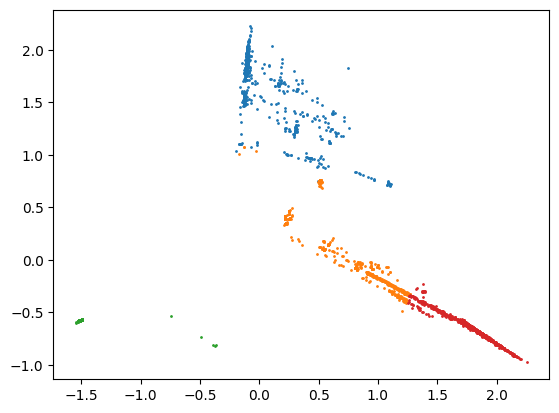

In [310]:
_clustering = y_pred.join(pd.DataFrame(reduced_data, columns=["x", "y"]))
draw_cluster(_clustering)

### By domain knowledge

clustering only by protocol

In [228]:
raw_data

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


In [229]:
tmp = raw_data.drop(["ID", "Flow.ID", "Source.IP", "Destination.IP", "Timestamp", "Label"], axis=1)
numeric_attr = ["Source.Port", "Destination.Port", "Protocol"]
tmp = tmp.drop(numeric_attr, axis=1)

In [230]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tf_data_ = scaler.fit_transform(tmp)
tf_data_ = pd.DataFrame(tf_data_, columns=tmp.columns)
tf_data_

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0.000834,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0.447341,0.428571,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0.134724,0.428571,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.000626,0.428571,9.008458e-09,0.0,9.008458e-09,9.008458e-09,0.637175,0.0,0.637175,0.637175
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0.000626,0.428571,9.008458e-09,0.0,9.008458e-09,9.008458e-09,0.113673,0.0,0.113673,0.113673


In [231]:
tf_data_[numeric_attr] = raw_data[numeric_attr]
for a in numeric_attr:
    tf_data_[a] = tf_data_[a].astype(str)
tf_data_ = pd.get_dummies(tf_data_)
display(tf_data_)

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Destination.Port_55035,Destination.Port_56147,Destination.Port_56224,Destination.Port_56342,Destination.Port_57429,Destination.Port_59658,Destination.Port_59979,Protocol_0,Protocol_17,Protocol_6
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,...,0,0,0,0,0,0,0,0,0,1
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,...,0,0,0,0,0,0,0,0,0,1
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,...,0,0,0,0,0,0,0,0,0,1
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,...,0,0,0,0,0,0,0,0,0,1
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,0.020204,0.001519,0.016871,...,0,0,0,0,0,0,0,0,1,0
4313,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,0.020418,0.001772,0.016328,...,0,0,0,0,0,0,0,0,1,0
4314,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
4315,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,0.024343,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [322]:
selected_feature = []
for a in tf_data_.columns:
    if a.find("Protocol")!=-1 or a.find("Destination.Port")!=-1 or a.find("Source.Port")!=-1:
        selected_feature.append(a)
y_pred = KMeans(n_clusters=4).fit_predict(tf_data_[selected_feature])
display(adjusted_mutual_info_score(ans["Cluster"], y_pred))

0.9904195002627223

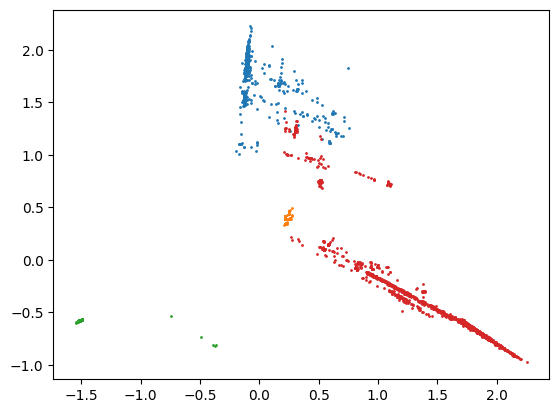

In [323]:
y_pred = pd.DataFrame(y_pred, columns=["cluster"])
_clustering = y_pred.join(pd.DataFrame(reduced_data, columns=["x", "y"]))
draw_cluster(_clustering)